### Test LogisticRegression

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from matplotlib.patches import Patch
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from final_project_code import FinalProject 
from newton_raphson import Newton_Raphson
from final_plot import plot_stuff

In [4]:
# from sklearn.metrics.pairwise import rbf_kernel

FP = FinalProject()
df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")

/tmp/ipykernel_13695/3545232409.py:3: DtypeWarning: Columns (3,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./AG_Corp_Prod_DataBase.csv")


In [5]:
df = FP.create_balanced_data(df)
# df = df.sample(n=10000, replace=False)
train, validate, test = FP.split_data(df)

df incorporated have 2393 many rows
after balancing, df not incorporated have 2393 many rows


In [6]:
cols=['TotalWorkers','TotalPower']
# RegionCoded is not generated here
cols = ["RegionCoded", "FactoryisCorpin1900", "NEWDEV"]
cols = cols[1:]

In [7]:
df_train, X_train, y_train = FP.prepare_data(train)
df_validate, X_validate, y_validate= FP.prepare_data(validate)
df_test, X_test, y_test = FP.prepare_data(test)

In [8]:
cols = ['PowerperWorker', 'RevperGrandWorker']
cols = ['logWorkers', 'logPower'] 

In [9]:
# only run once, convert to numpy
X_train, y_train = FP.make_ready_for_regression(X_train, y_train, cols)
X_validate, y_validate= FP.make_ready_for_regression(X_validate, y_validate, cols)
X_test, y_test= FP.make_ready_for_regression(X_test, y_test, cols)

In [10]:
from newton_raphson import Newton_Raphson
NR = Newton_Raphson() 
NR.regress(y = y_train, X = X_train, max_iters = 1e3, tol=1e-15, converged=False)

learning rate is: 0.5
Regularization is: True
number of iteration: 10
beta: [[  516.28805794]
 [ 1787.67195079]
 [-1429.11939363]]


/home/xianzhiwang/ml0451/ml-0451-final-proj/posts/final-blog-post/newton_raphson.py:35: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


number of iteration: 20
beta: [[  263.27490383]
 [   96.02404839]
 [-1355.20349548]]
number of iteration: 30
beta: [[ 179.27917401]
 [   7.14642413]
 [-787.34272352]]
number of iteration: 40
beta: [[  54.02617268]
 [   2.11965938]
 [-237.16886663]]
number of iteration: 50
beta: [[ 0.73015557]
 [ 0.11186911]
 [-3.29529669]]
number of iteration: 60
beta: [[ 1.06334261]
 [ 0.10968743]
 [-4.65452511]]
number of iteration: 70
beta: [[ 1.06405021]
 [ 0.10969094]
 [-4.65747183]]
number of iteration: 80
beta: [[ 1.06405114]
 [ 0.10969094]
 [-4.65747577]]
number of iteration: 90
beta: [[ 1.06405114]
 [ 0.10969094]
 [-4.65747577]]
number of iteration: 100
beta: [[ 1.06405114]
 [ 0.10969094]
 [-4.65747577]]
Converged with 104 iterations
The beta we end up with is: [[ 1.06405114]
 [ 0.10969094]
 [-4.65747577]]


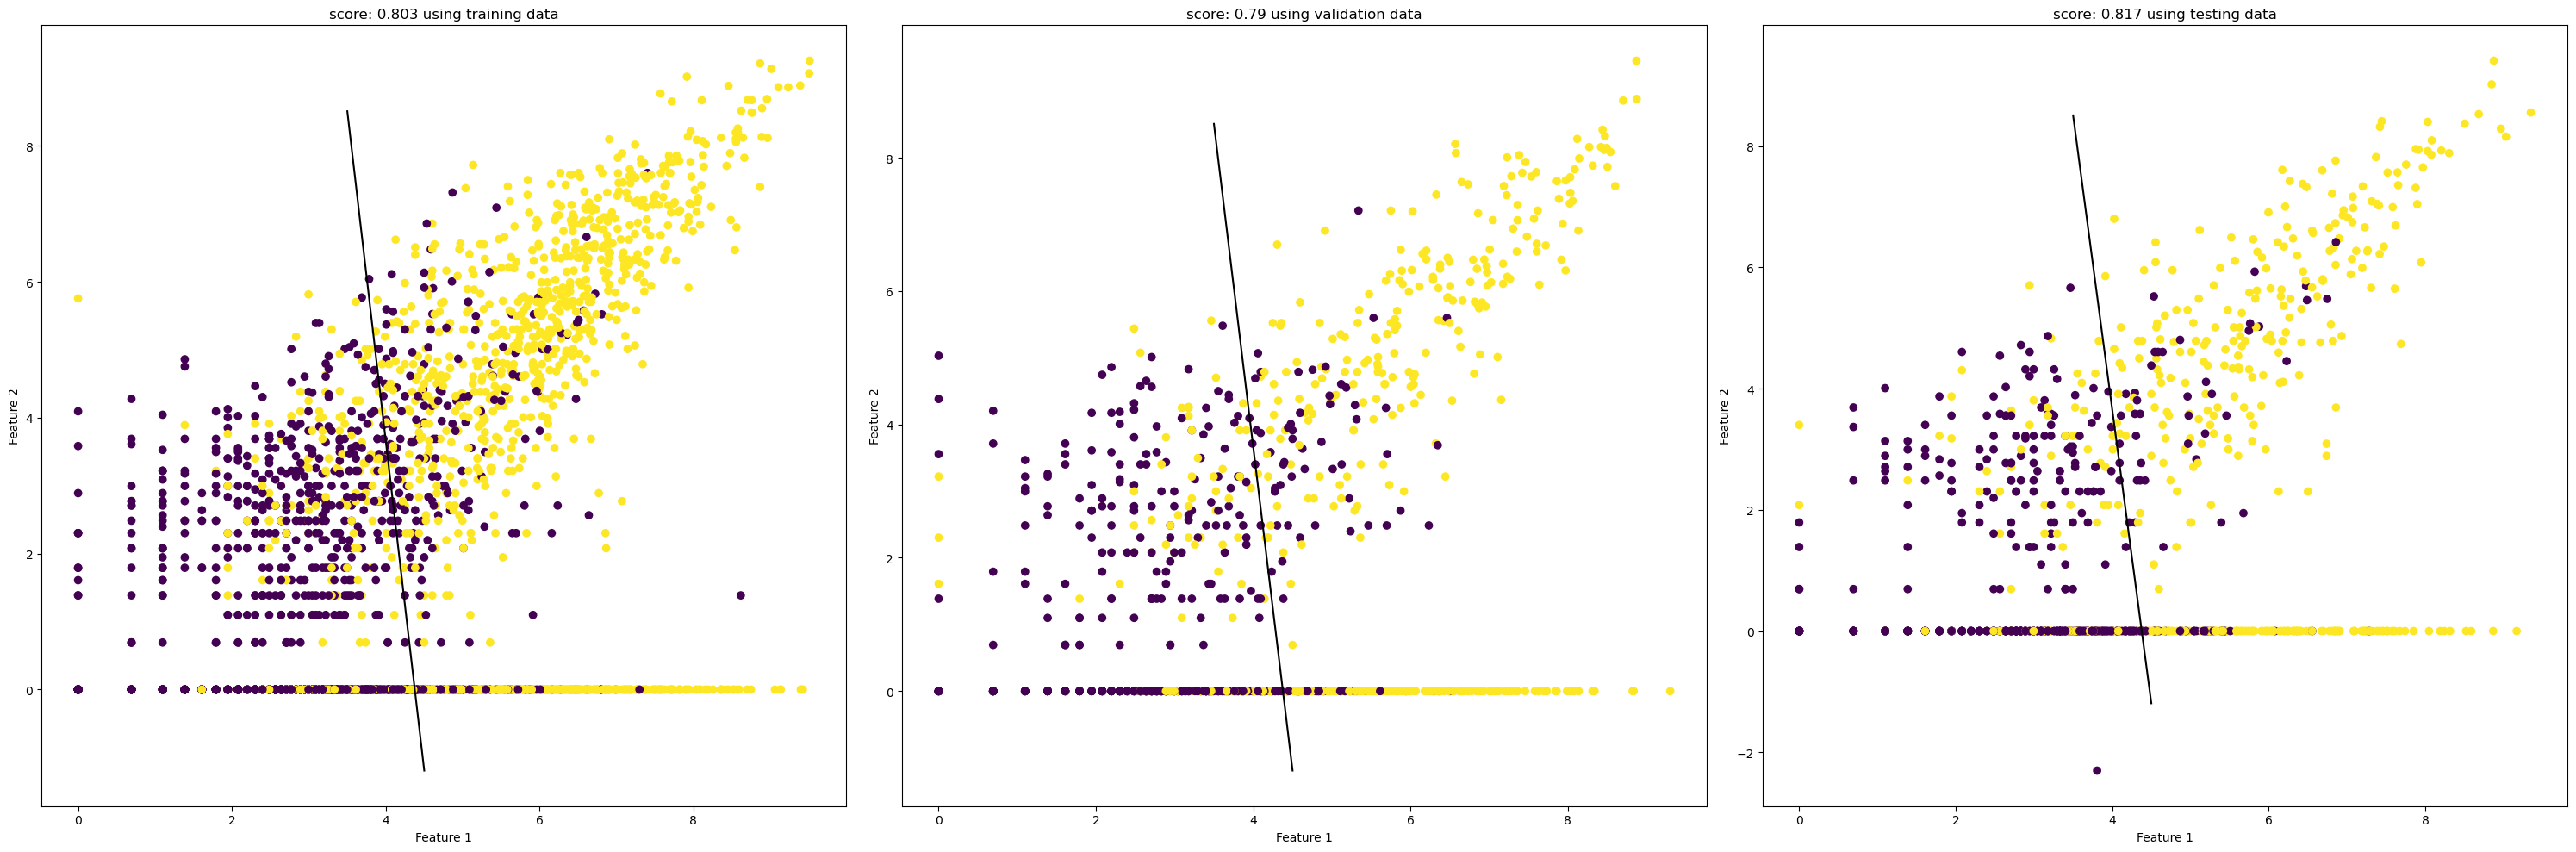

In [28]:
NR.big_plot(X_train, y_train, X_validate, y_validate, X_test, y_test, 30, 10)

the weight beta is: [[ 1.06405114]
 [ 0.10969094]
 [-4.65747577]]
0.8025078369905956
0.8173277661795407
0.7899686520376176


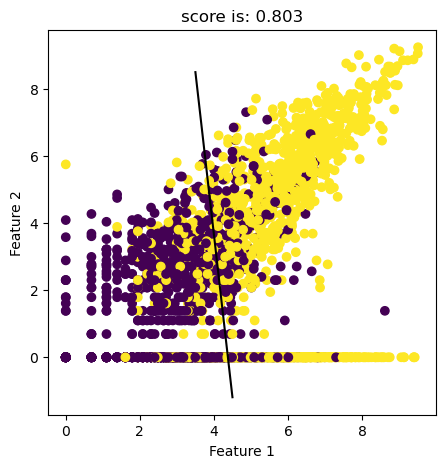

In [12]:
NR.bare_bone_plot(X_train, y_train, 5,5)
print(NR.score(X_train,y_train))
print(NR.score(X_test,y_test))
print(NR.score(X_validate,y_validate))

In [13]:
# from final_plot import plot_stuff
# PS = plot_stuff()
cols = ['logWorkers', 'logPower'] 

In [14]:
LR = LogisticRegression(solver="newton-cg")
LR.fit(X_train, y_train)
LR.coef_

/home/xianzhiwang/miniforge3/envs/ml-0451/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[1.06218722, 0.10987587]])

In [15]:
LRscoreTest = LR.score(X_test, y_test)
print(LRscoreTest)
LRscoreTrain= LR.score(X_train, y_train)
print(LRscoreTrain)

0.8173277661795407
0.8025078369905956


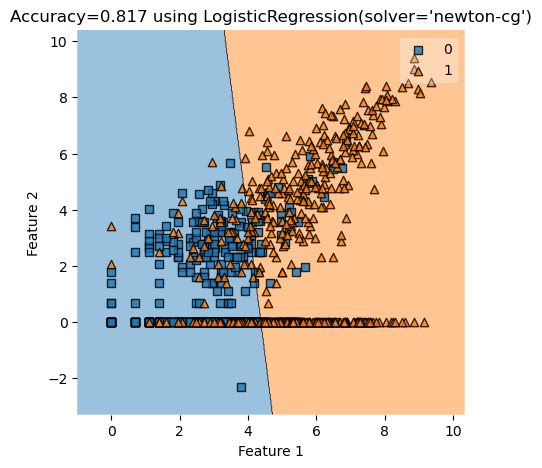

In [16]:
y_test= y_test.reshape(-1)
NR.simple_plot(LR, X_test, y_test, 5, 5)

[[1.06218722 0.10987587]]
-4.650112405682134


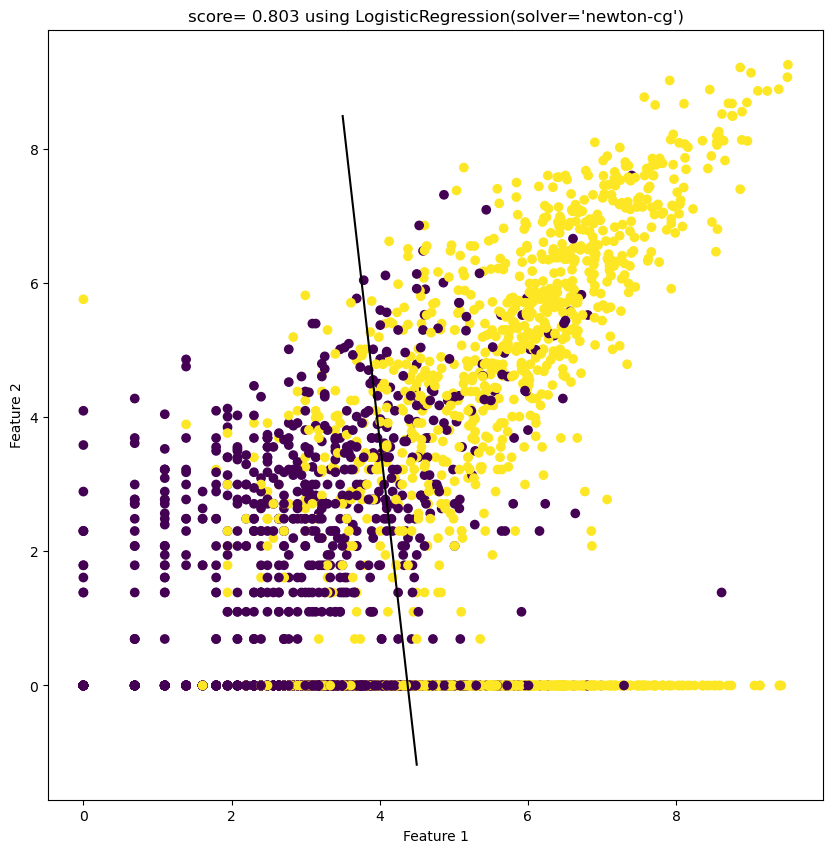

In [30]:
print(LR.coef_)
a_0 = LR.coef_[0][0]
a_1 = LR.coef_[0][1]
print(LR.intercept_[0])
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
f1 = np.linspace(3.5,4.5, 501)
p = plt.plot(f1, - (LR.intercept_/a_1) - (a_0/a_1)*f1, color = "black")
title = plt.gca().set_title(f"score= {round(LRscoreTrain,3)} using {LR}")

In [18]:
from newton_raphson import Newton_Raphson
NR2 = Newton_Raphson()

In [19]:
DTree = DecisionTreeClassifier(random_state=0)
DTree.fit(X_train, y_train)
DTree.score(X_train, y_train)

0.9191919191919192

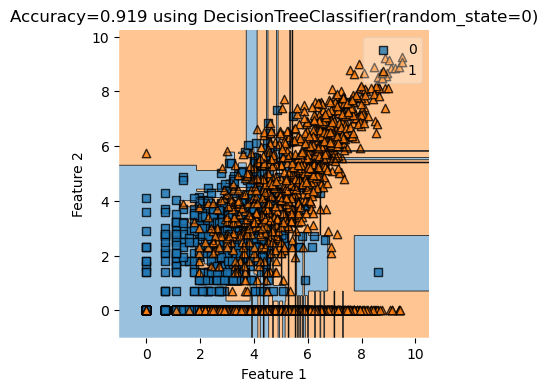

In [21]:
y_train = y_train.reshape(-1)
NR2.simple_plot(DTree, X_train, y_train, 4,4)

In [22]:
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train, y_train)
RandomForest.score(X_train, y_train)

0.9191919191919192

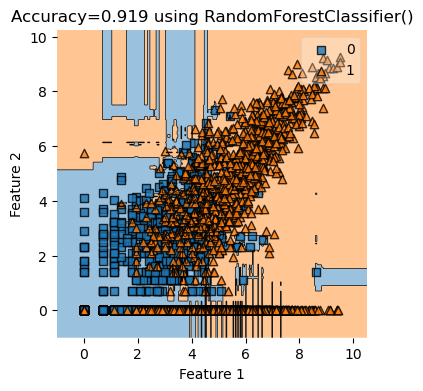

In [24]:
NR2.simple_plot(RandomForest, X_train, y_train, 4,4)

In [25]:
SVC2 = SVC(kernel="linear", gamma = "auto", shrinking=False)

In [26]:
SVC2.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', shrinking=False)

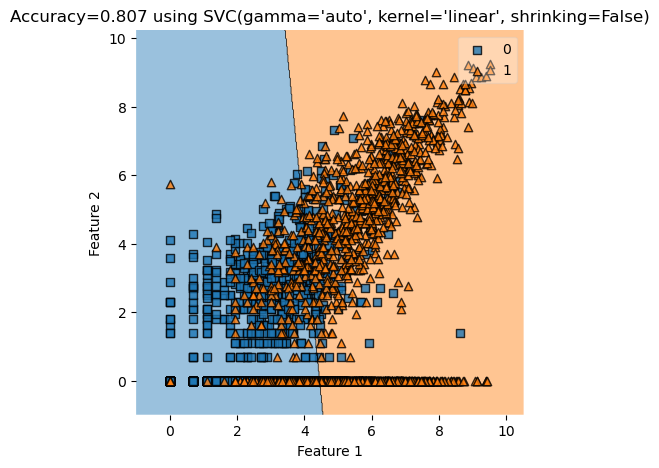

In [27]:
NR2.simple_plot(SVC2, X_train, y_train,5,5)